**Project Aim** <br>
The aim of this project is to implement and compare a range of dimension reduction algorithms
- How many features can explain the same amount or limited variance compared to other

**Dataset Notes**
- Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.


**Project Assumptions** <br>
- Porto Driving Data
    - The target values are binary labels which 1 means that claim was filed
    - The postfix bin is used for binary features;
    - The postfix cat to is used for categorical features;
    - Features without the bin or cat indications are real numbers (continuous values) of ingegers (ordinal vlaues);
    - A missing value is indicated by -1
    - The value that is subject of prediction is in the target column. This one indicates whether or not a claim was filed for that insured person;
    - id is a data input ordinal number.
- MNIST Image Dataset
    - No EDA required as already considered as part of SVM project

**Project Objective** <br>
Categorical Variable Feature Engineering (refer to Chapter 5 feature Engineering)
- Fit a linear model for a single category for each encoding type
    - One-Hot Encoding
    - Dummy Factor Encoding 
    - Effect Encoding
- Implement an example of Feature Hashing
- Implement an example of bin counting (should the data meet the required assumption) and leverage group by to generate totality statistics
    - Create raw count features
    - Create odds-ratio (and log-odds ratio)
- Implement a solution to deal with Rare-Categories
- Highlight if there are any unbounded count categories and create normalised count features if required
<br>

Implement a range of Dimension Reduction Algorithms
- Missing Value Ratio
- Low Variance Filter
- Correlation (inc. High Correlation Filter)
    - Implement correlation and calculate the percentage of variation (r-sq) explained by a subsample of predictors (only numerical values)
    - For correlation calculate statistical significance to highlight the probability of error within the identified correlations and output the sample size (as sample size can impact outcomes significantly)
- PCA (and incremental/randomised/Kernel plus how to sleect the best kernel PCA) and compare the results
    - For PCA output statistics (loadings & scores) regarding the components and plot a scree plot
- ZCA applied to the MNIST dataset

Perhaps complete non-linear in a separate notebook each
- BPDR (Backward Progressive Dimensionality Reduction)
- ICA
    - Technique to uncover or verify statistically independent variables or dimensions in high-dimensional data
    - Complete ICA preprocessing (centering & whitening - Transform a data point linearly so components are uncorrelated and of equal unity)
    - Implement two methods for defining independence in ICA (Minimization of Mutual Information/Non-Gaussianity Maximization)
- Factor Analysis --- Categorical Data
    - Complete exploratory factor analysis (describe function)
    - Complete confirmatory factor analysis (determine the degree of uniqueness, factor loadings and factor matrix)
    - Calculate the model degree of freedom and determine the factor limit (i.e. when are two many factors attempting to be used in relation to the number of variables available
- NNMF (a.k.a NMF)
- LDA (and applied to K-Means)
- Local linear Embeddings 
- Non-Linear Dimension Reduction: (t-SNE/IsoMap/MDS)

Calculate explained variance ratio
Plot and select the correct number of dimenions that retain 95% variability 
Reverse the projection for PCA and calculate the reconstruction error
Implement Incremental PCA
Neatly store: Date/Data set/Pickle Model
Document brief conclusions

**Dimension Reduction Notes** <br>
Out of scope feature selection methods can also be used for dimension reduction
- Random Forest
    - Add brief notes
- Backward Feature Elimination
    - Add brief notes
- Forward Feature Selection
    - Add brief notes

**Conclusions** <br>

**Extra Work**
- PCA Regression

**Potential Gotchas** <br>

**References** <br>
https://towardsdatascience.com/organize-your-data-and-models-using-the-object-oriented-programming-and-pickle-876a6654494 <br>
https://towardsdatascience.com/my-6-part-powerful-eda-template-that-speaks-of-ultimate-skill-6bdde3c91431 <br>
https://medium.com/analytics-vidhya/5-lesser-known-seaborn-plots-most-people-dont-know-82e5a54baea8 <br>
https://www.kaggle.com/sinamhd9/safe-driver-prediction-a-comprehensive-project <br>
https://www.kaggle.com/minarabbit/exploratory-analysis-and-prediction-1 <br>

In [7]:
import numpy

In [8]:
!pip install fastcluster

  Using cached https://files.pythonhosted.org/packages/56/5c/e227399348a5157698bd43962be10d9abe6be5d2236cd25d9710d0522982/fastcluster-1.1.28.tar.gz
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/private/var/folders/6d/wwd3sd6178x1c8lfg797dgpc0000gn/T/pip-build-mgehht_3/fastcluster/setup.py", line 12, in <module>
        import numpy
    ModuleNotFoundError: No module named 'numpy'
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /private/var/folders/6d/wwd3sd6178x1c8lfg797dgpc0000gn/T/pip-build-mgehht_3/fastcluster/
You are using pip version 9.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import fastcluster

ModuleNotFoundError: No module named 'fastcluster'

In [2]:
train_data = pd.read_csv('/Users/Rej1992/Documents/DimensionReduction_RawData/train.csv')
test_data = pd.read_csv('/Users/Rej1992/Documents/DimensionReduction_RawData/test.csv')

In [ ]:
print('train data size', train_data.shape)
print('test data size', test_data.shape)
display(train_data.head())
display(test_data.head())

In [ ]:
print('Columns in train and not in test dataset:', set(train_data.columns) - set(test_data.columns))

In [ ]:
sns.set_style('white')
sns.set_palette("Paired")
sns.set(font_scale=1.5)
plt.figure()
sns.countplot(train_data['target'],palette='nipy_spectral')
plt.show()

In [3]:
train_data.shape

(595212, 59)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## Exploratory Data Analysis 

In [6]:
train_data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
train_data = train_data.sample(n = 500) 

In [ ]:
vars_with_missing = []

for feature in train_data.columns:
    missings = train_data[train_data[feature] == -1][feature].count()
    if missings >0 :
        vars_with_missing.append(feature)
        missings_perc = missings / trainset.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

In [ ]:
print('Nan values =', train_data.isnull().sum().sum())
df_missing_train = pd.DataFrame({'column':train_data.columns, 'missing(%)':((train_data==-1).sum()/train_data.shape[0])*100})
df_missing_test = pd.DataFrame({'column':test_data.columns, 'missing(%)':((test_data==-1).sum()/test_data.shape[0])*100})

df_missing_train_nl = df_missing_train.nlargest(7, 'missing(%)')
df_missing_test_nl = df_missing_test.nlargest(7, 'missing(%)')
sns.set_palette(sns.color_palette('nipy_spectral'))
plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_train_nl, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in training set')
plt.show()
plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_test_nl, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in test set')
plt.show()

In [ ]:
### Categorical Data
features = df_train.columns.tolist()
cat_features = [c for c in features if 'cat' in c]
bin_features = [b for b in features if 'bin' in b]
cat_features_df = pd.DataFrame({'Categorical features': cat_features})
bin_features_df = pd.DataFrame({'Binary features': bin_features})

int_features = df_train.select_dtypes(include=['int64']).columns.tolist()
ordinal_features = [o for o in int_features if ('cat' not in o and 'bin' not in o and 'id' not in o and 'target' not in o )]
ord_features_df = pd.DataFrame({'Ordinal features': ordinal_features})

cont_features = df_train.select_dtypes(include=['float64']).columns.tolist()
cont_features_df = pd.DataFrame({'Numerical Continuous features': cont_features})


# uses code from https://www.kaggle.com/bertcarremans/data-preparation-exploration (see references)

# data=[]
# for feature in trainset.columns:
#     # Defining the role
#     if feature == 'target':
#         use = 'target'
#     elif feature == 'id':
#         use = 'id'
#     else:
#         use = 'input'
        
#     # Defining the type
#     if 'bin' in feature or feature == 'target':
#         type = 'binary'
#     elif 'cat' in feature or feature == 'id':
#         type = 'categorical'
#     elif trainset[feature].dtype == float or isinstance(trainset[feature].dtype, float):
#         type = 'real'
#     elif trainset[feature].dtype == int:
#         type = 'integer'
        
#     # Initialize preserve to True for all variables except for id
#     preserve = True
#     if feature == 'id':
#         preserve = False
        
#     # Defining the data type
#     dtype = trainset[feature].dtype
    
#     category='none'
#     # Defining the category
#     if 'ind' in feature:
#         category='individual'
#     elif 'reg' in feature:
#         category='registration'
#     elif 'car' in feature:
#         category='car'
#     elif 'calc' in feature:
#         category = 'calculated'
        
#     # Creating a Dict that contains all the metadata for the variable
#     feature_dictionary = {
#         'varname': feature,
#         'use':use,
#         'type':type,
#         'preserve':preserve,
#         'dtype':dtype,
#         'category':category
#     }
#     data.append(feature_dictionary)
    
# metadata = pd.DataFrame(data, columns=['varname', 'use', 'type', 'preserve', 'dtype', 'category'])
# metadata.set_index('varname', inplace=True)
# metadata

#pd.DataFrame({'count':metadata.groupby(['category'])['category'].size()}).reset_index()

#pd.DataFrame({'count':metadata.groupby(['use', 'type'])['use'].size()}).reset_index()

In [ ]:
i=0
t1=trainset.loc[trainset['target'] != 0]
t0=trainset.loc[trainset['target'] == 0]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(3,4,figsize=(16,12))

for feature in var:
    i += 1
    plt.subplot(3,4,i)
    sns.kdeplot(t1[feature], bw=0.5, label='target=1')
    sns.kdeplot(t0[feature], bw=0.5, label='target=0')
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [ ]:
def corr_heatmap(var):
    correlations = trainset[var].corr()
    
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(50,10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={'shrink':.75})
    plt.show()
    
var = metadata[(metadata.type=='real')&(metadata.preserve)].index
corr_heatmap(var)

In [ ]:
bin_col = [col for col in trainset.columns if '_bin' in col]
zero_list=[]
one_list=[]
for col in bin_col:
    zero_list.append((trainset[col]==0).sum()/trainset.shape[0]*100)
    one_list.append((trainset[col]==1).sum()/trainset.shape[0]*100)
plt.figure()
fig, ax = plt.subplots(figsize=(6,6))
# Bar plot
p1 = sns.barplot(ax=ax, x=bin_col, y=zero_list, color='blue')
p2 = sns.barplot(ax=ax, x=bin_col, y=one_list, bottom=zero_list, color='red')
plt.ylabel('Percent of zero/one [%]', fontsize=12)
plt.xlabel('Binary features', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend((p1, p2), ('Zero', 'One'))
plt.show()

### Boxenplot and Stripplot
- The ‘boxenplot’, an expansion of the boxplot, seeks to address the problems of boxplots by adding more quantiles

In [28]:
train_data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
321154,802535,0,3,1,8,0,0,0,1,0,...,2,0,1,6,0,1,0,0,0,0
45401,113839,0,2,2,1,0,0,0,1,0,...,3,1,2,11,0,0,0,0,0,0
61162,153298,0,1,1,3,0,0,0,0,1,...,4,3,3,11,0,0,1,0,0,0
240816,601682,0,3,2,3,1,0,0,1,0,...,5,1,2,4,0,0,1,0,0,0
430796,1076566,0,5,1,3,1,0,0,0,1,...,4,3,0,8,0,1,1,1,0,0


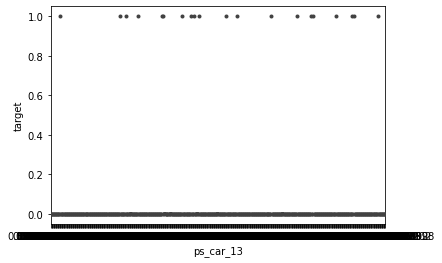

In [31]:
import seaborn as sns
# ax = sns.boxenplot(x="ps_car_13", 
#                    y="target", 
#                    data=train_data,
#                    showfliers=False)


ax = sns.stripplot(x="ps_car_13", 
                   y="target", 
                   data=train_data,
                   size=4, 
                   color=".26")


# sns.boxenplot(train_data.ps_calc_01, 
#               #hue, #standard data inputs, only x is required
#               orient = 'h', #either 'v' or 'h' (horizontal or vertical)
#               scale = 'linear', #linear, exponential, area - width for value boxes
#               outlier_propfloat = '0.2', #proportion of data to be marked as outliers
#               showfliersbool = 'False') #if false, suppress outier plotting

### Clustered Heatmaps
- Clustered heatmaps are often used for correlation matrices (correlations between every combination of two features), but can be used for really any matrix, as long as its elements are on the same scale.
- There are many heatmap clustering algorithms and methods, but each of them try to break down a dimension by its most important elements, clustering similar features (perhaps by correlation or another metric) together at a lower level and more distinct elements at a higher level.

In [10]:
categorical_data = train_data.loc[:, train_data.columns.str.endswith("_cat")] 
binned_data = train_data.loc[:, train_data.columns.str.endswith("_bin")] 

In [ ]:
sns.clustermap(binned_data, #2d array-like rectangular data
              # metricstr, #distance metric to use for data (default euclidean)
              # z_scoreint, #whether to calculate z-scores or not
              # standard_scaleint #whether to standardize data or not
              ) 

/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [6]:
# There are no na values in the dataset
#train_data.isna().sum()

In [20]:
cols = binned_data.columns
for i in cols:
    print(i)
    print(binned_data[i].value_counts())
    print("""""")

ps_ind_06_bin
0    360852
1    234360
Name: ps_ind_06_bin, dtype: int64

ps_ind_07_bin
0    442223
1    152989
Name: ps_ind_07_bin, dtype: int64

ps_ind_08_bin
0    497644
1     97568
Name: ps_ind_08_bin, dtype: int64

ps_ind_09_bin
0    484917
1    110295
Name: ps_ind_09_bin, dtype: int64

ps_ind_10_bin
0    594990
1       222
Name: ps_ind_10_bin, dtype: int64

ps_ind_11_bin
0    594205
1      1007
Name: ps_ind_11_bin, dtype: int64

ps_ind_12_bin
0    589594
1      5618
Name: ps_ind_12_bin, dtype: int64

ps_ind_13_bin
0    594648
1       564
Name: ps_ind_13_bin, dtype: int64

ps_ind_16_bin
1    393330
0    201882
Name: ps_ind_16_bin, dtype: int64

ps_ind_17_bin
0    523143
1     72069
Name: ps_ind_17_bin, dtype: int64

ps_ind_18_bin
0    503879
1     91333
Name: ps_ind_18_bin, dtype: int64

ps_calc_15_bin
0    522342
1     72870
Name: ps_calc_15_bin, dtype: int64

ps_calc_16_bin
1    373698
0    221514
Name: ps_calc_16_bin, dtype: int64

ps_calc_17_bin
1    329856
0    265356
Name: ps

## Dimension Reduction Algorithms